Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# OSCILACIJE (1)
## 25.02.2020. 

# Luka Simić

***
<font color='red'>
Preimenovati svesku: File/Rename u __[2]oscilacije_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

### __Zadatak 1__: Posmatra se telo mase $m$ vezano za idealnu oprugu krutosti $k$, koje se kreće po glatkoj horizontalnoj podlozi duž $x$ ose. Na telo deluje otporna sila čiji je intenzitet srazmeran brzini $v$. Poznate su vrednosti sopstvene kružne učestanosti $\omega_0$, faktora prigušenja $\alpha$, početne pozicije u kojoj se nalazi telo $x_0$ i početne brzine $v_0$.

a) Definisati funkciju __prigusene__ koja modeluje zadati problem i omogućava rešavanje diferencijalne jednačine primenom integrate.odeint metode <font color='red'>[0.5]</font>. Funkcija poziva parametre $\omega_0$ i $\alpha$.

In [0]:
def prigusene(y, t, omega0, alpha):
    y1, y2 = y
    return [y2, -2*alpha*y2 - omega0**2 * y1]

b) Napisati komande koje uvoze modul numpy, modul matplotlib.pyplot i funkciju za integraciju iz scipy modula.

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

c) Definisati vrednost sopstvene kružne učestanosti $ω_0 = 1 rad/s$, i listu koja sadrži četiri različite vrednosti koje uzima faktor prigušenja: $α_1 = ω_0$, $α_2 = ω_0/10$, $α_3 = 15ω_0$ i $α_4 = 0$. <br>
Definisati početne uslove: telo se u početnom trenutku nalazi na rastojanju $x_0 = 10 m$ od ravnotežnog položaja i ima brzinu $v_0 = 20 m/s$.<br>
Definisati vremensku osu: 0 do 60 sekundi u 1000 ekvidistantnih tačaka.

In [0]:
omega0 = 1
alpha = [omega0, omega0/10, 15 * omega0, 0]
x0 = 10
v0 = 20
t = np.linspace(0, 60, 1000)

d) Napisati kod koji omogućava da se u okviru istog Figure prozora (korišćenjem naredbe subplot), iscrtaju vremenski odzivi $x(t)$ za sve četiri vrednosti faktora prigušenja <font color='red'>[0.5]</font>. Označiti ose grafika (“vreme [s]” i “x(t) [m]”). Na graficima prikazati legendu koja se odnosi na odgovarajuću vrednost faktora prigušenja $α$.<br>
_Da bi se prikazao grafik potrebno je izvršiti komandu plt.show()_

<Figure size 432x288 with 0 Axes>

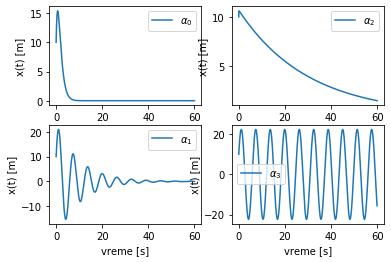

In [74]:
plt.figure(1)
_, axis = plt.subplots(2, 2)
for i, alfa in enumerate(alpha):
    integrisano = odeint(prigusene, (x0, v0), t, (omega0, alfa))
    plot = axis[i % 2, int(i / 2)]
    plot.plot(t, np.transpose(integrisano)[0], label='$\\alpha_' + str(i) + '$')
    plot.set(xlabel='vreme [s]', ylabel='x(t) [m]')
    plot.legend()
plt.show()

e) Napisati kod koji omogućava da se u okviru istog Figure prozora (korišćenjem naredbe subplot), iscrtaju fazni dijagrami za sve četiri vrednosti faktora prigušenja <font color='red'>[0.5]</font>. Označiti ose grafika (“x [m]” i “v(t) [m/s]”). Na graficima prikazati legendu koja se odnosi na odgovarajuću vrednost faktora prigušenja  $α$ .

<Figure size 432x288 with 0 Axes>

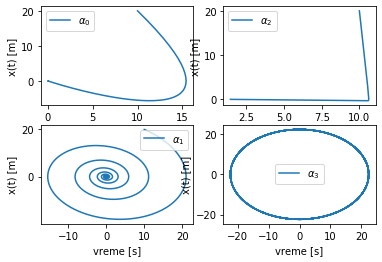

In [75]:
plt.figure(1)
_, axis = plt.subplots(2, 2)
for i, alfa in enumerate(alpha):
    x, v = np.transpose(odeint(prigusene, (x0, v0), t, (omega0, alfa)))
    plot = axis[i % 2, int(i / 2)]
    plot.plot(x, v, label='$\\alpha_' + str(i) + '$')
    plot.set(xlabel='vreme [s]', ylabel='x(t) [m]')
    plot.legend()
plt.show()

f) Na osnovu prethodna dva grafika odrediti tip oscilacija za svaku od vrednosti koeficijenta prigušenja. Proceniti vremenski trenutak u kom se dostiže stacionarno stanje (ako se dostiže) i navesti ga za svaki od prikazanih grafika. Dodatno, za svaki tip oscilacija prokomentarisati i ukratko prodiskutovati oblik faznog dijagrama <font color='red'>[0.5]</font>.

- $\alpha_0$: Kritično prigušene oscilacije, stacionarno stanje na oko 10 sekundi.
- $\alpha_1$: Kvazi-periodične oscilacije, stacionarno stanje na oko 60 sekundi.
- $\alpha_2$: Aperiodične oscilacije, stacionarno stanje na oko 60 sekundi.
- $\alpha_3$: Linearne harmonijske oscilacije, ne dostiže stacionarno stanje.

g) Napisati kod koji omogućava da se na istom dijagramu iscrtaju zavisnost kinetičke (plavom bojom) i potencijalne energije (crvenom bojom) sistema od vremena $t$ za faktor prigušenja $α = ω_0/10$, ako je masa tela koje osciluje $1 kg$ <font color='red'>[0.25]</font>.

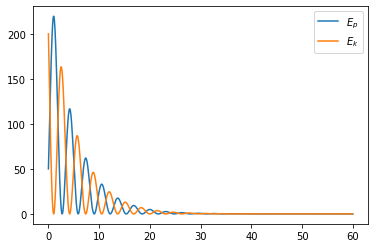

In [76]:
m = 1
a = omega0 / 10
x, v = np.transpose(odeint(prigusene, (x0, v0), t, (omega0, a)))
k = omega0**2 * m
Ek = (m * v**2) / 2
Ep = (k * x**2) / 2
plt.plot(t, Ep, label='$E_p$')
plt.plot(t, Ek, label='$E_k$')
plt.legend()
plt.show()

h) Napisati kod koji omogućava da se iscrta zavisnost ukupne energije sistema za parametre kao u prethodnoj tački (tačka g)) i komentarisati dobijeni grafik <font color='red'>[0.25]</font>. Zašto grafik nije glatka, opadajuća funkcija?

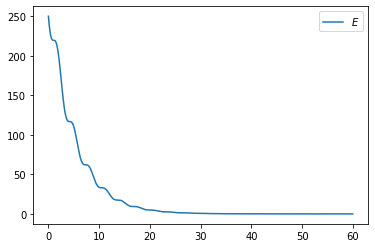

In [77]:
m = 1
a = omega0 / 10
x, v = np.transpose(odeint(prigusene, (x0, v0), t, (omega0, a)))
k = omega0**2 * m
Ek = (m * v**2) / 2
Ep = (k * x**2) / 2
plt.plot(t, Ek + Ep, label='$E$')
plt.legend()
plt.show()

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

### __Zadatak 2__: Posmatra se telo mase $m$ vezano za idealnu oprugu krutosti $k$, koje se kreće po glatkoj horizontalnoj podlozi duž $x$ ose. Na telo deluje otporna sila čiji je intenzitet srazmeran brzini $v$ i spoljašnja harmonijska sila amplitude $F_0$ i kružne učestanosti $Ω$ koja ima za cilj da kompenzuje disipaciju energije u ovom sistemu. Poznate su vrednosti sopstvene kružne učestanosti $ω_0$, faktora prigušenja $α$, početne pozicije u kojoj se nalazi telo $x_0$ i početne brzine $v_0$.

a) Definisati funkciju __prinudne__ koja modeluje zadati problem i omogućava rešavanje diferencijalne jednačine primenom integrate.odeint metode <font color='red'>[0.5]</font>. Funkcija poziva parametre $\omega_0$, $\alpha$, $F_0$, $m$ i $Ω$.

In [0]:
def prinudne(y, t, omega0, alpha, F0, m, omega):
    y1, y2 = y
    return [y2, F0/m * np.sin(omega * t) - 2*alpha*y2 - omega0**2 * y1]

b) Napisati komande koje uvoze modul numpy, modul matplotlib.pyplot i funkciju za integraciju iz scipy modula 

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

c) Poznate su vrednosti sopstvene kružne učestanosti $ω_0 = 10 rad/s$, faktora prigušenja $α = ω_0/20$, amplitude $F_0 = 20 N$ i kružne učestanosti $Ω = 2 rad/s$ prinudne sile. Masa tela je $m = 1 kg$.<br>
Definisati početne uslove: Telo u početnom trenutku miruje na rastojanju $x_0 = 10 m$ od ravnotežnog položaja.<br>
Definisati vremensku osu: 0 do 60 sekundi u 6000 ekvidistantnih tačaka.

In [0]:
omega0 = 10
alpha = omega0 / 20
F0 = 20
omega = 2
m = 1
x0 = 10
t = np.linspace(0, 60, 6000)

d) Napisati kod koji omogućava da se iscrta grafik vremenskog odziva $x(t)$ <font color='red'>[0.25]</font>. Označiti ose grafika (“vreme [s]” i “x(t) [m]”). 

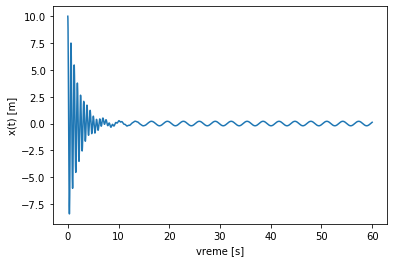

In [81]:
x, _ = np.transpose(odeint(prinudne, (x0, 0), t, (omega0, alpha, F0, m, omega)))
plt.plot(t, x)
plt.xlabel('vreme [s]')
plt.ylabel('x(t) [m]')
plt.show()

e) Napisati kod koji omogućava da se iscrta fazni dijagram $v(x)$ <font color='red'>[0.25]</font>. Označiti ose grafika (“x(t) [m]” i “v(t) [m/s]”). 

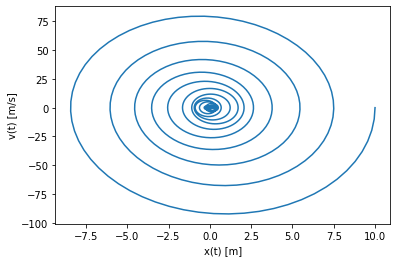

In [82]:
x, v = np.transpose(odeint(prinudne, (x0, 0), t, (omega0, alpha, F0, m, omega)))
plt.plot(x, v)
plt.xlabel('x(t) [m]')
plt.ylabel('v(t) [m/s]')
plt.show()

f) Šta se uočava na faznom dijagramu u trenutku kada u vremenskom odzivu preostaju samo oscilacije kao posledica prinudne sile <font color='red'>[0.5]</font>? Napisati kod koji omogućava da se iscrta dodatni grafik, zumirani fazni dijagram, tako da limiti za x osu budu od -0.5 do 0.5, a za y osu od -4 do 4. 

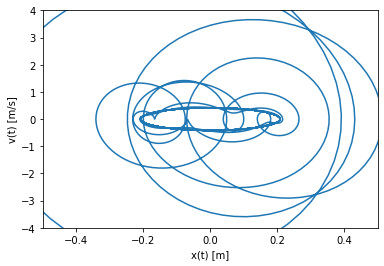

In [83]:
x, v = np.transpose(odeint(prinudne, (x0, 0), t, (omega0, alpha, F0, m, omega)))
plt.plot(x, v)
plt.xlabel('x(t) [m]')
plt.ylabel('v(t) [m/s]')
plt.xlim(-0.5, 0.5)
plt.ylim(-4, 4)
plt.show()

Uočavamo zatvorenu elipsu na sredini faznog dijagrama kao posledicu prinudnih oscilacija.

g) Neka se frekvencija prinudne sile menja u opsegu frekvencija $Ω = [0, 2ω_0]$ sa korakom $ω_0/50$. Napisati kod koji omogućava da se iscrta amplitudska karakteristika prinudnog odziva $A(Ω)$ koristeći se analitičkim izrazom za amplitudsku karakteristiku (sa slajdova) <font color='red'>[0.5]</font>. Označiti ose grafika (“učestanost prinudne sile” i “amplituda prinudnih oscilacija”). Prikazati legendu "analitička metoda".

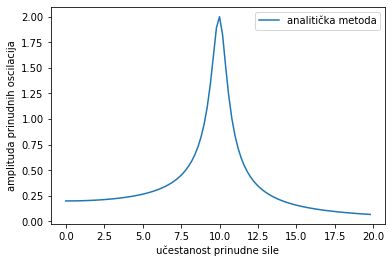

In [84]:
Omega = np.arange(0, 2*omega0, omega0/50)
A = (F0/m) / np.sqrt((omega0**2 - Omega**2)**2 + (2 * alpha * Omega)**2)
plt.plot(Omega, A, label='analitička metoda')
plt.xlabel('učestanost prinudne sile')
plt.ylabel('amplituda prinudnih oscilacija')
plt.legend()
plt.show()

h) Napisati kod koji omogućava numeričko određivanje amplitudske karakteristike <font color='red'>[1]</font>. Iscrtati amplitudsku karakteristiku dobijenu numeričkom metodom (isprekidanom crvenom linijom). Označiti ose grafika (“učestanost prinudne sile” i “amplituda prinudnih oscilacija”). Prikazati legendu "numerička metoda".<br>
_Hint:_ Rešiti jednačinu za svako $Ω$ iz opsega $[0, 2ω_0]$ na vremenskoj osi od 0 do 300 sekundi u 2000 ekvidistantnih tačaka. Vremenska osa je produžena da bi bili sigurni da je sistem dostigao stacionarno stanje, tj. da je prelazni režim u kom postoje prigušene oscilacije završen. Amplituda oscilacija u stacionarnom odzivu se može naći kao maksimalni element niza na zadatom vremenskom intervalu. 

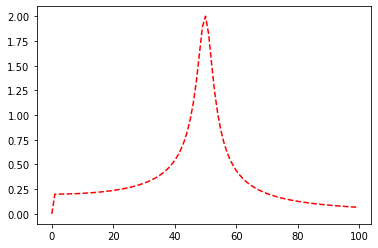

In [97]:
start_from = 1500
t1 = np.linspace(0, 300, 2000)
ampl = []
for i, omega in enumerate(Omega):
    x, _ = np.transpose(odeint(prinudne, (x0, 0), t1, (omega0, alpha, F0, m, omega)))
    ampl.append(max(x[start_from:]))
plt.plot(ampl, color='red', linestyle='dashed')
#plt.xlabel('vreme [s]')
#plt.ylabel('x(t) [m]')
plt.show()

i)	Napisati kod koji omogućava da se iz numerički dobijene amplitudske karakteristike odredi pri kojoj frekvenciji pobudne sile numerička kriva dostiže maksimalnu vrednost. Ova vrednost frekvencije naziva se rezonantna frekvencija. Prikazati numerički određenu vrednost za rezonantnu učestanost. Prikazati vrednost za rezonantnu učestanost koja se dobija na osnovu analitičkog izraza prikazanog na slajdovima. Izračunati relativno odstupanje za rezonantnu učestanost određenu numerički u odnosu na učestanost određenu na osnovu analitičkog izraza <font color='red'>[1]</font>. 

In [100]:
omega_max_num = ampl.index(max(ampl)) * omega0 / 50
omega_max_anal = np.sqrt(omega0**2 - 2 * alpha**2)
print((omega_max_num - omega_max_anal) / omega_max_num)

0.0025031328369998105


j)	Koristeći se analitičkim izrazima sa slajdova, napisati kodove koji omogućavaju da se na istoj slici, u okviru dva subplot-a, prikažu amplitudska $A(Ω)$ i fazna $φ(Ω)$ karakteristika za različite parametre prinudne i otporne sile: 1) kada su svi parametri isti kao u postavci zadatka (plava linija), 2) kada je amplituda sile dvostruko manja, a ostali parametri kao iz postavke zadatka (crvena linija), 3) kada je koeficijent prigušenja $α$ dvostruko veći, a ostali parametri kao iz postavke zadatka (zelena linija) <font color='red'>[1]</font>. Prikazati legendu oznaka i obeležiti ose grafika.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future ve

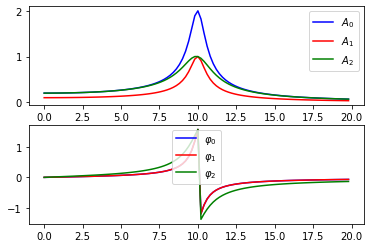

In [115]:
def stuff(F0, alpha, color, i):
  np.seterr(divide='ignore')
  A = (F0 / m) / np.sqrt((omega0**2 - Omega**2)**2 + (2 * alpha * Omega)**2)
  phi = np.arctan(2 * alpha * Omega / (omega0**2 - Omega**2))
  plt.subplot(211)
  plt.plot(Omega, A, color=color, label='$A_' + str(i) + '$')
  plt.legend()
  plt.subplot(212)
  plt.plot(Omega, phi, color=color, label='$\\varphi_' + str(i) + '$')
  plt.legend()

stuff(F0, alpha, 'blue', 0)
stuff(F0/2, alpha, 'red', 1)
stuff(F0, alpha * 2, 'green', 2)
plt.show()

k)	Na osnovu iscrtanih amplitudskih karakteristika komentarisati kako promena amplitude prinudne sile i faktora prigušenja otporne sile utiče na oblik amplitudske karakteristike <font color='red'>[1]</font>.

Sa smanjenjem amplitude prinudne sile smanjuje se amplituda na rezonantnoj frekvenciji a sa smanjenjem prigušenja smanjuje se amplituda na frekvencijama bliskim rezonantnoj.